### House Price Prediction in Python



In [41]:
!pip install seaborn
!pip install scikit-learn

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("C:\\Users\\pauri\\OneDrive\\Escritorio\\Python projects\\House Price Prediction in Python\\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.dropna(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Separamos los datos del DataFrame inicial para poder facilitarle al modelo datos que no haya visto nunca en la parte de entrenamiento del modelo

In [48]:
from sklearn.model_selection import train_test_split
X = df.drop(["median_house_value"],axis=1)
Y = df["median_house_value"]

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [50]:
train_df = X_train.join(Y_train)

In [51]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11910,-117.41,33.96,24.0,4481.0,901.0,2398.0,823.0,3.8640,INLAND,123400.0
12067,-117.58,33.85,6.0,16431.0,2640.0,8222.0,2553.0,5.2861,INLAND,195100.0
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,114100.0
6414,-118.01,34.14,20.0,3350.0,831.0,1816.0,744.0,2.8352,INLAND,161700.0
18389,-121.88,37.24,14.0,7174.0,950.0,2782.0,899.0,8.3065,<1H OCEAN,394200.0
...,...,...,...,...,...,...,...,...,...,...
15194,-117.01,32.99,8.0,3372.0,430.0,1536.0,448.0,8.4284,<1H OCEAN,378300.0
6208,-117.90,34.06,33.0,1330.0,209.0,578.0,192.0,5.6406,<1H OCEAN,266200.0
19608,-121.12,37.48,5.0,4109.0,820.0,3062.0,713.0,3.2396,INLAND,125200.0
20304,-119.18,34.16,27.0,1832.0,415.0,1480.0,414.0,3.9643,NEAR OCEAN,186000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

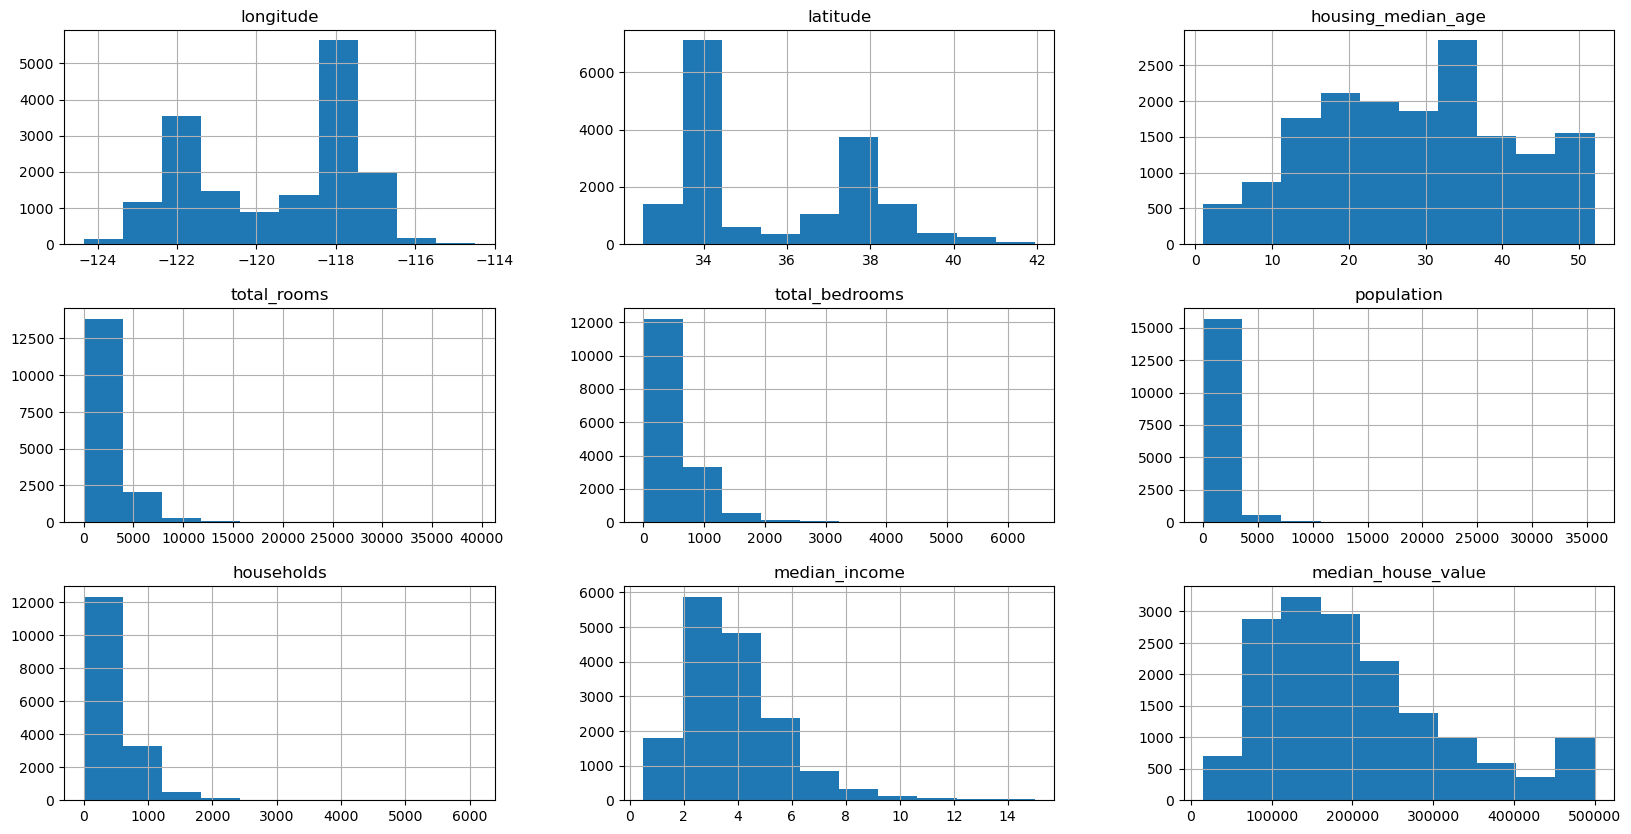

In [52]:
train_df.hist(figsize=(20,10))

<Axes: >

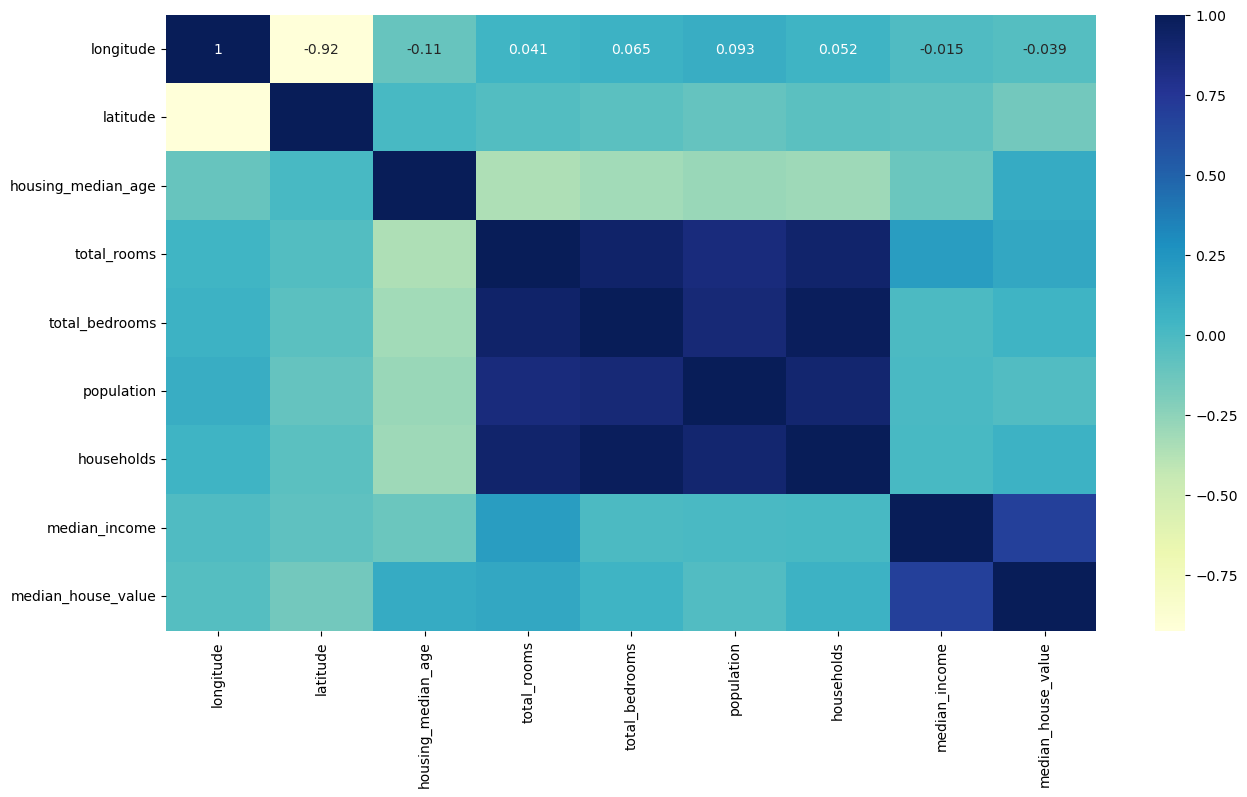

In [53]:
numeric_df = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]

plt.figure(figsize=(15,8))
sns.heatmap(train_df[numeric_df].corr(),annot=True,cmap="YlGnBu")

Vamos a tomar el logaritmo para normalizar y eliminar los valores extremos de las variables con colas de distribución sesgadas

In [55]:
train_df["total_rooms"]= np.log(train_df["total_rooms"]+1)
train_df["total_bedrooms"]= np.log(train_df["total_rooms"]+1)
train_df["population"]= np.log(train_df["total_rooms"]+1)
train_df["households"]= np.log(train_df["total_rooms"]+1)

In [56]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11910,-117.41,33.96,24.0,8.407825,2.241542,2.241542,2.241542,3.8640,INLAND,123400.0
12067,-117.58,33.85,6.0,9.706986,2.370896,2.370896,2.370896,5.2861,INLAND,195100.0
12754,-121.37,38.61,39.0,6.714171,2.043059,2.043059,2.043059,3.0833,INLAND,114100.0
6414,-118.01,34.14,20.0,8.117014,2.210142,2.210142,2.210142,2.8352,INLAND,161700.0
18389,-121.88,37.24,14.0,8.878358,2.290346,2.290346,2.290346,8.3065,<1H OCEAN,394200.0
...,...,...,...,...,...,...,...,...,...,...
15194,-117.01,32.99,8.0,8.123558,2.210860,2.210860,2.210860,8.4284,<1H OCEAN,378300.0
6208,-117.90,34.06,33.0,7.193686,2.103364,2.103364,2.103364,5.6406,<1H OCEAN,266200.0
19608,-121.12,37.48,5.0,8.321178,2.232289,2.232289,2.232289,3.2396,INLAND,125200.0
20304,-119.18,34.16,27.0,7.513709,2.141678,2.141678,2.141678,3.9643,NEAR OCEAN,186000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

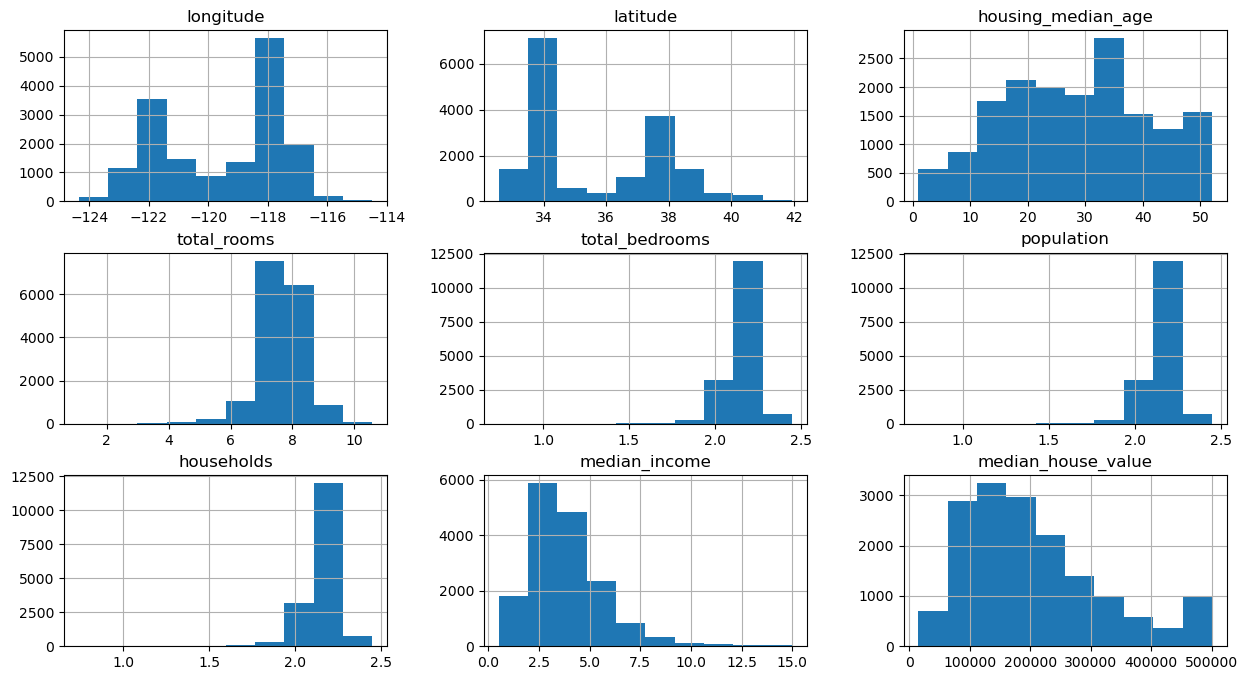

In [57]:
train_df.hist(figsize=(15,8))

Vamos a pasar los datos de ocen proximity a numéricos para poder analizarlos

In [59]:
train_df=train_df.join(pd.get_dummies(train_df.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)

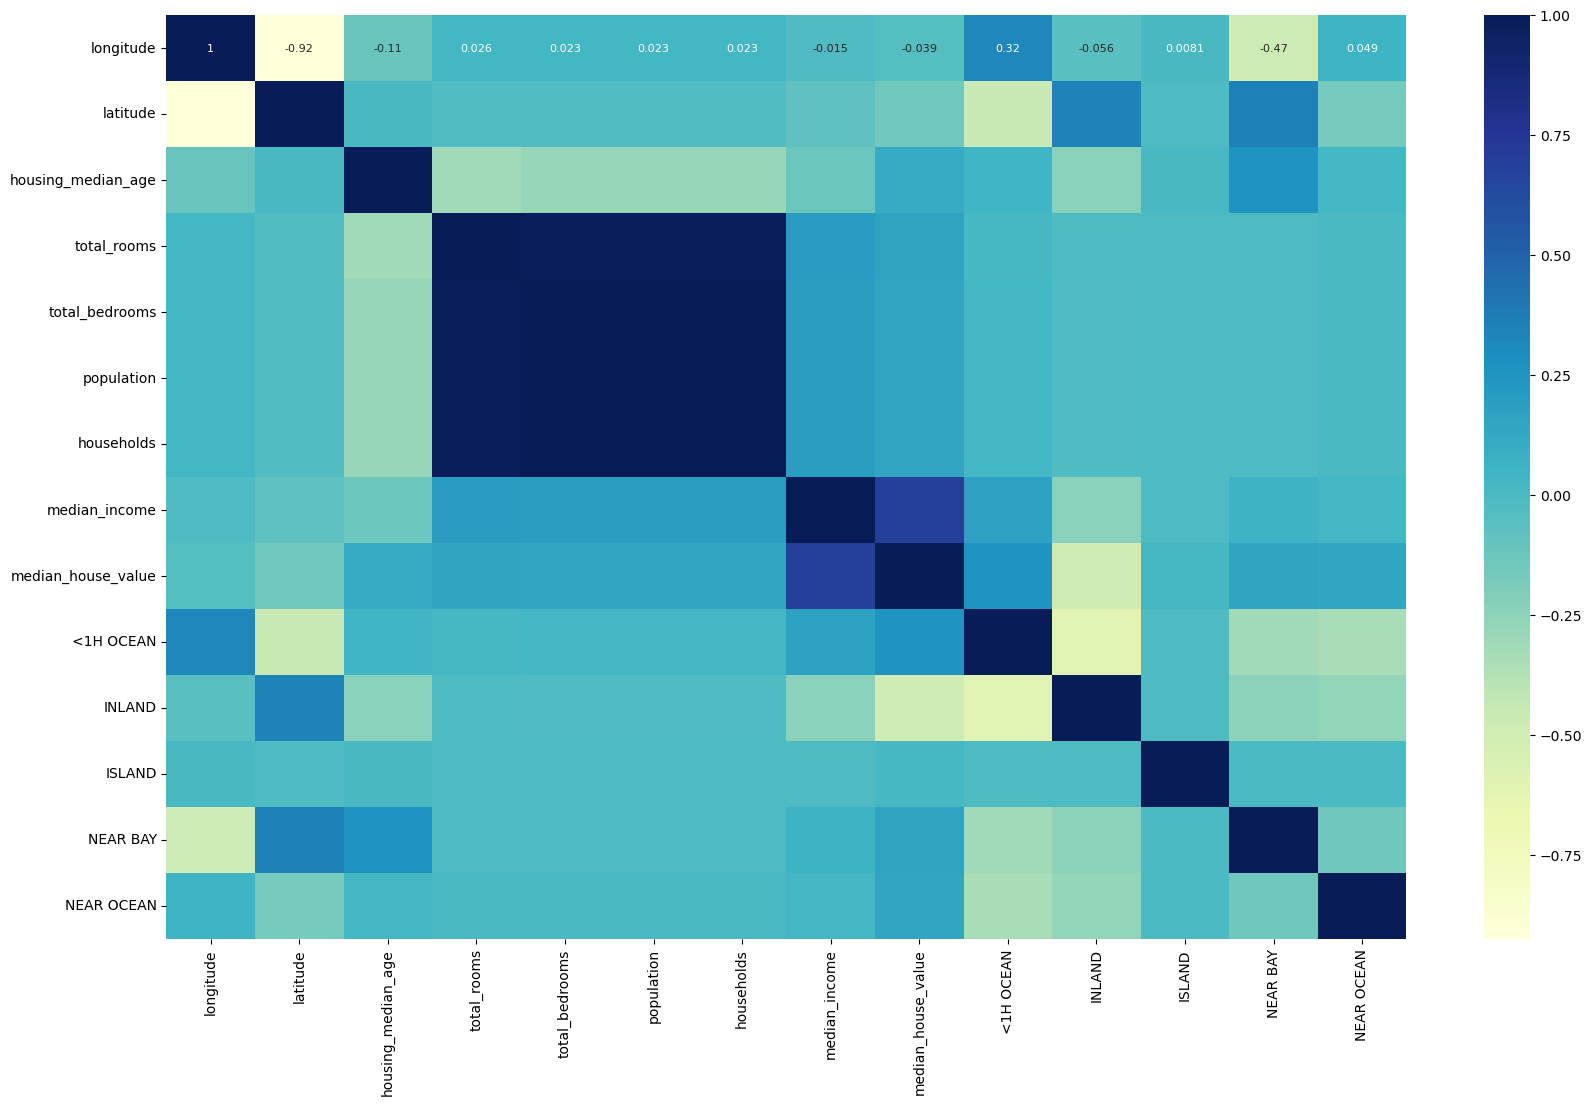

In [60]:
plt.figure(figsize=(20,12))
sns.heatmap(train_df.corr(),annot=True,annot_kws={"size":8},cmap="YlGnBu")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

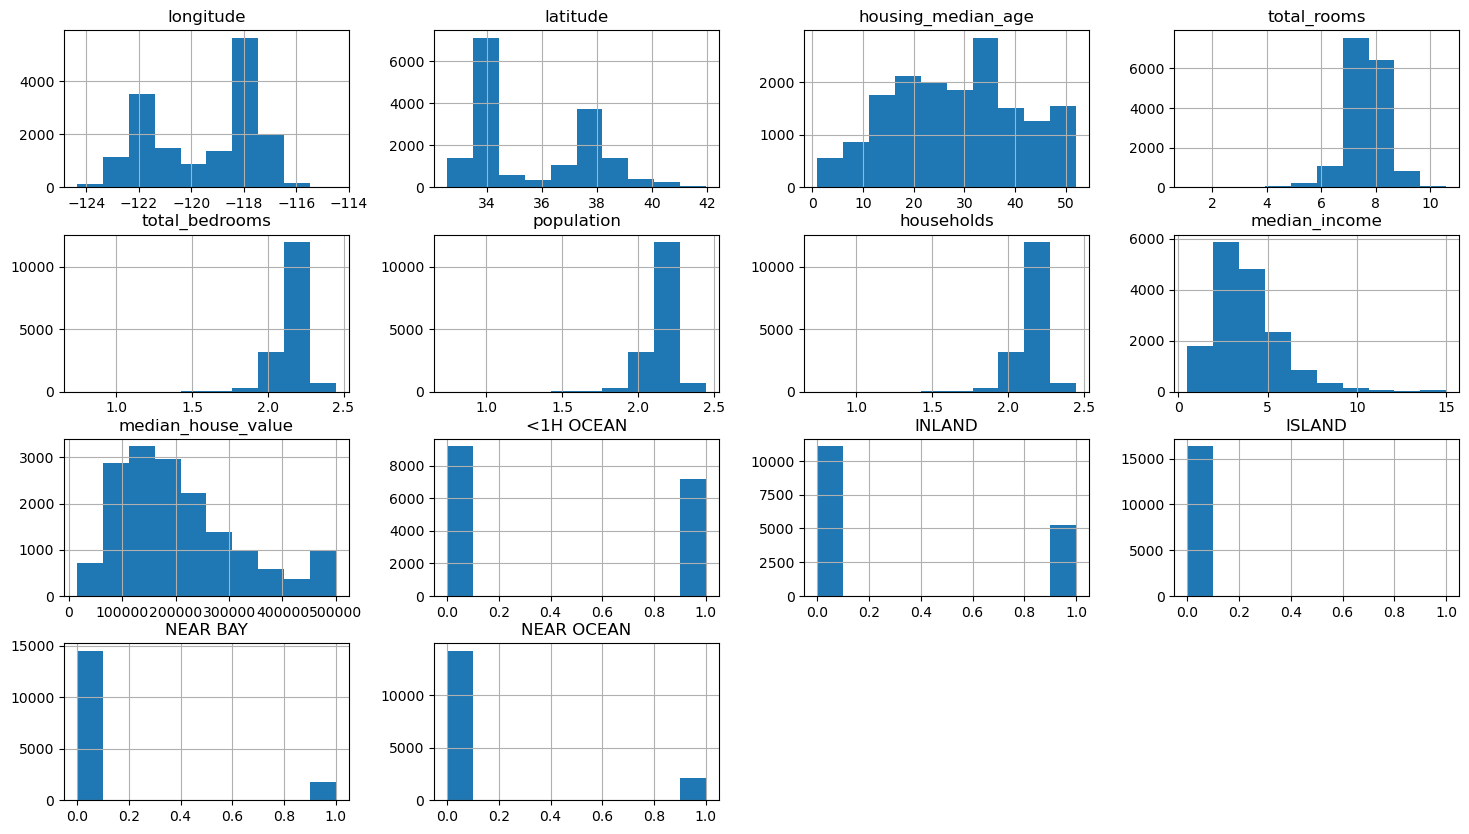

In [61]:
train_df.hist(figsize=(18,10))

<Axes: xlabel='latitude', ylabel='longitude'>

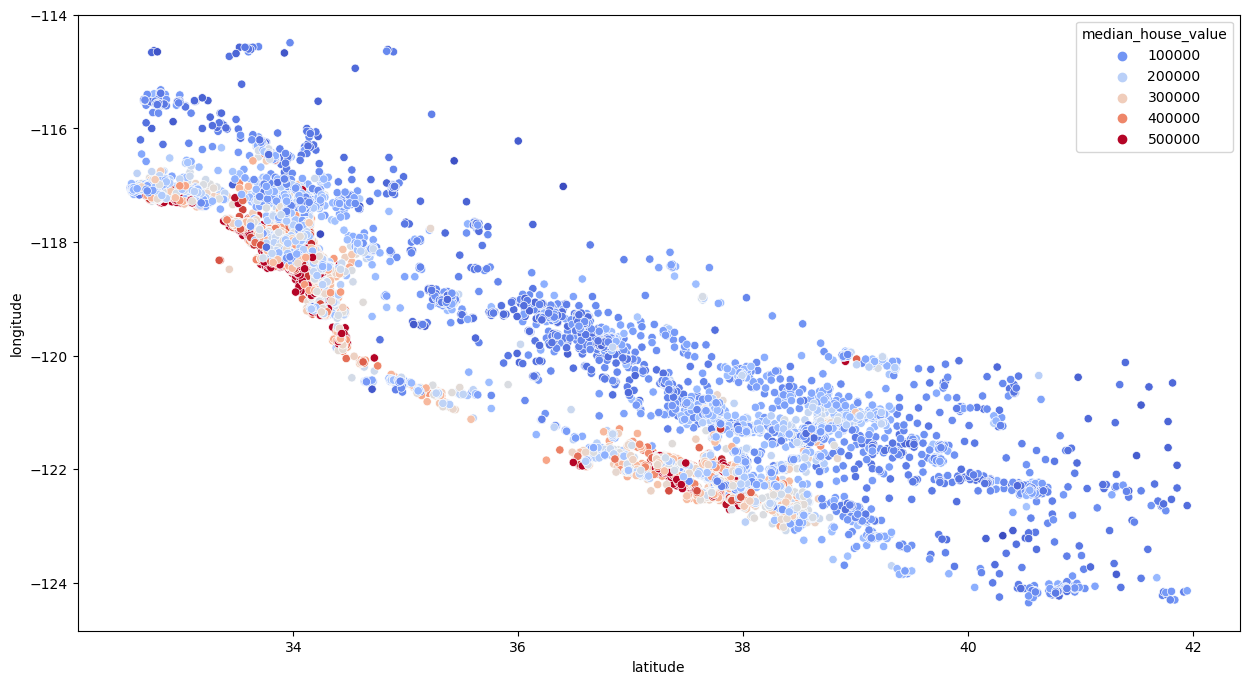

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_df,hue="median_house_value",palette="coolwarm")

In [63]:
train_df["bedroom_ratio"] = train_df["total_bedrooms"]/ train_df["total_rooms"]
train_df["household_rooms"] =train_df["total_rooms"]/train_df["households"]

<Axes: >

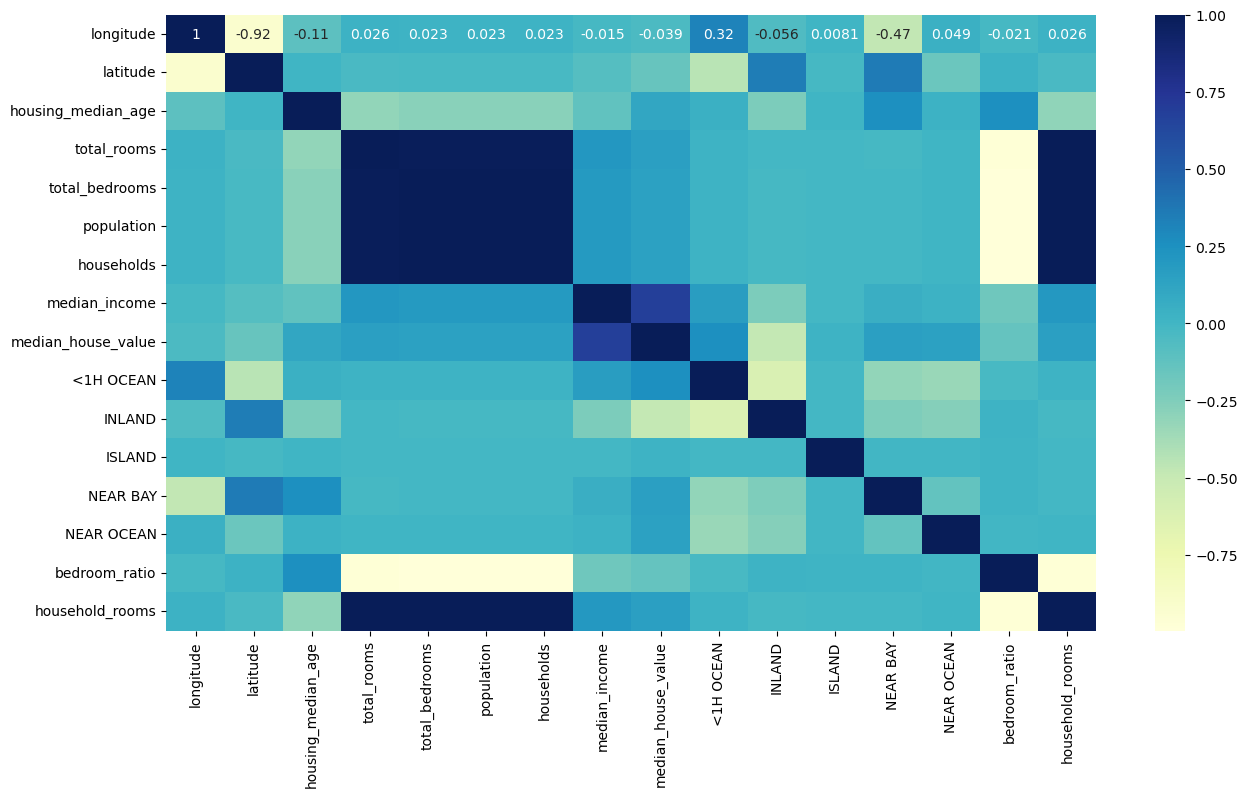

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [65]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11910,-117.41,33.96,24.0,8.407825,2.241542,2.241542,2.241542,3.8640,123400.0,0,1,0,0,0,0.266602,3.750911
12067,-117.58,33.85,6.0,9.706986,2.370896,2.370896,2.370896,5.2861,195100.0,0,1,0,0,0,0.244246,4.094226
12754,-121.37,38.61,39.0,6.714171,2.043059,2.043059,2.043059,3.0833,114100.0,0,1,0,0,0,0.304291,3.286332
6414,-118.01,34.14,20.0,8.117014,2.210142,2.210142,2.210142,2.8352,161700.0,0,1,0,0,0,0.272285,3.672620
18389,-121.88,37.24,14.0,8.878358,2.290346,2.290346,2.290346,8.3065,394200.0,1,0,0,0,0,0.257970,3.876426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,-117.01,32.99,8.0,8.123558,2.210860,2.210860,2.210860,8.4284,378300.0,1,0,0,0,0,0.272154,3.674388
6208,-117.90,34.06,33.0,7.193686,2.103364,2.103364,2.103364,5.6406,266200.0,1,0,0,0,0,0.292390,3.420086
19608,-121.12,37.48,5.0,8.321178,2.232289,2.232289,2.232289,3.2396,125200.0,0,1,0,0,0,0.268266,3.727644
20304,-119.18,34.16,27.0,7.513709,2.141678,2.141678,2.141678,3.9643,186000.0,0,0,0,0,1,0.285036,3.508329


### Simple Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_df.drop(["median_house_value"],axis=1), train_df["median_house_value"]

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [68]:
test_df = X_test.join(Y_test)

test_df["total_rooms"]= np.log(test_df["total_rooms"]+1)
test_df["total_bedrooms"]= np.log(test_df["total_rooms"]+1)
test_df["population"]= np.log(test_df["total_rooms"]+1)
test_df["households"]= np.log(test_df["total_rooms"]+1)

test_df=test_df.join(pd.get_dummies(test_df.ocean_proximity).astype(int)).drop(["ocean_proximity"],axis=1)

test_df["bedroom_ratio"] = test_df["total_bedrooms"]/ test_df["total_rooms"]
test_df["household_rooms"] =test_df["total_rooms"]/test_df["households"]

In [69]:
X_test, Y_test = test_df.drop(["median_house_value"],axis=1), test_df["median_house_value"]

In [70]:
reg.score(X_test,Y_test)

0.6193714601565854

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [73]:
forest.score(X_test,Y_test)

0.8260863855481062

In [104]:
y_pred=forest.predict(X_test)

In [108]:
resultados = pd.DataFrame({"Predicciones":y_pred,"Valores Reales":Y_test})
resultados

,Predicciones,Valores Reales
11400,306274.01,295600.0
14502,285430.08,196800.0
10789,306484.14,236400.0
19031,247096.00,198000.0
4882,120685.00,123100.0
...,...,...
6794,203273.00,219000.0
6191,165966.00,168600.0
16527,176539.00,163900.0
18802,128174.00,141200.0
